In [ ]:
# # mount to location where data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.0/705.0 kB 6.8 MB/s eta 0:00:00


In [ ]:
pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 1.9 MB/s eta 0:00:00


# **YOLO_pretrained_100epochs_new_test_4**


0: 640x640 5 cardboards, 6 hard_plastics, 9 metals, 7 soft_plastics, 133.3ms
Speed: 8.1ms preprocess, 133.3ms inference, 28.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 cardboards, 2 hard_plastics, 5 metals, 11 soft_plastics, 104.6ms
Speed: 3.6ms preprocess, 104.6ms inference, 35.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 cardboards, 6 hard_plastics, 8 metals, 7 soft_plastics, 86.2ms
Speed: 2.3ms preprocess, 86.2ms inference, 28.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 cardboards, 7 hard_plastics, 8 metals, 8 soft_plastics, 90.9ms
Speed: 2.4ms preprocess, 90.9ms inference, 34.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 6 cardboards, 6 hard_plastics, 8 metals, 6 soft_plastics, 89.3ms
Speed: 4.0ms preprocess, 89.3ms inference, 34.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 cardboards, 4 hard_plastics, 7 metals, 5 soft_plastics, 113.4ms
Speed: 2.8ms preprocess, 113.4ms inference

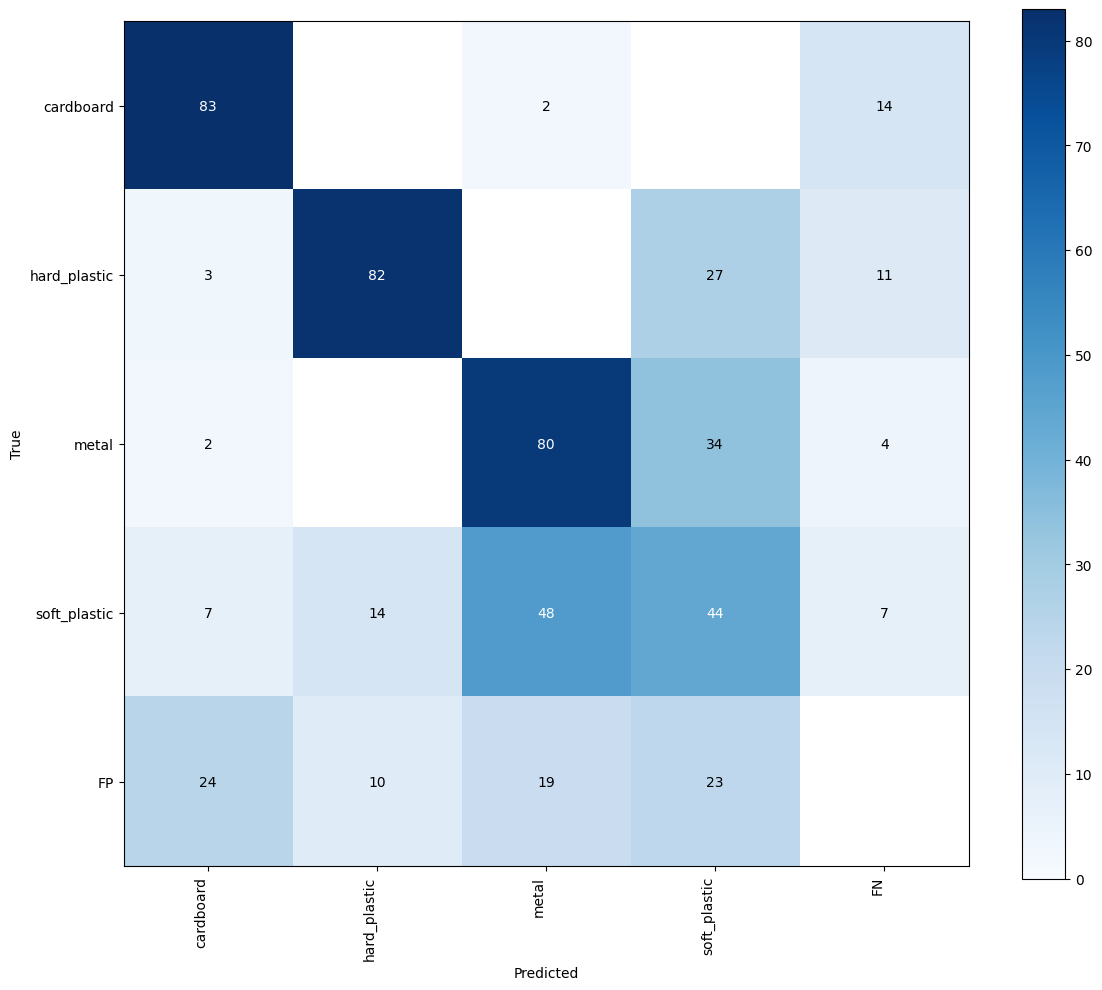

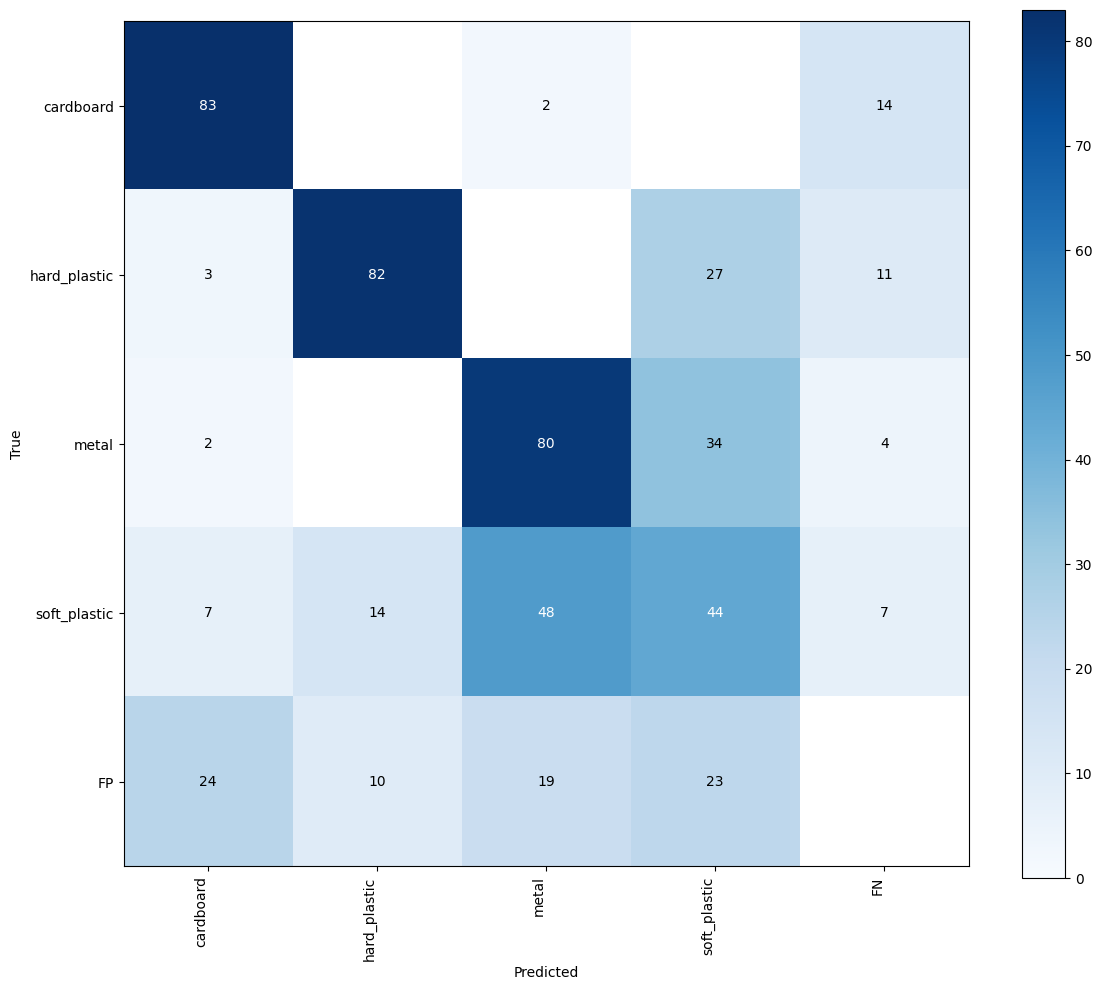

In [ ]:
import os
import supervision as sv
from ultralytics import YOLO
import numpy as np

# Define Paths and Names of Trained Model
annotations_folder = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/labels"
data_yaml_path = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/data.yaml"
dataset_folder = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4"
model_weights_path = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/runs/segment/20240110_yolov8n-seg_segmentation_100epochs_new/weights/best.pt"
images_directory_path = "/content/drive/My Drive/enhanced_waste_segmentation_Yolov8/data/test_4/images"

# Create a Detection Dataset
dataset = sv.DetectionDataset.from_yolo(annotations_directory_path=annotations_folder, data_yaml_path=data_yaml_path, images_directory_path=images_directory_path)

# Initialize YOLOv8 Model
model = YOLO(model_weights_path)

def callback(image: np.ndarray) -> sv.Detections:
    result = model(image)[0]
    return sv.Detections.from_ultralytics(result)

# Generate Confusion Matrix
confusion_matrix = sv.ConfusionMatrix.benchmark(
    dataset=dataset,
    callback=callback
)

# Plot Confusion Matrix
confusion_matrix.plot()


## Add specifications for the plot

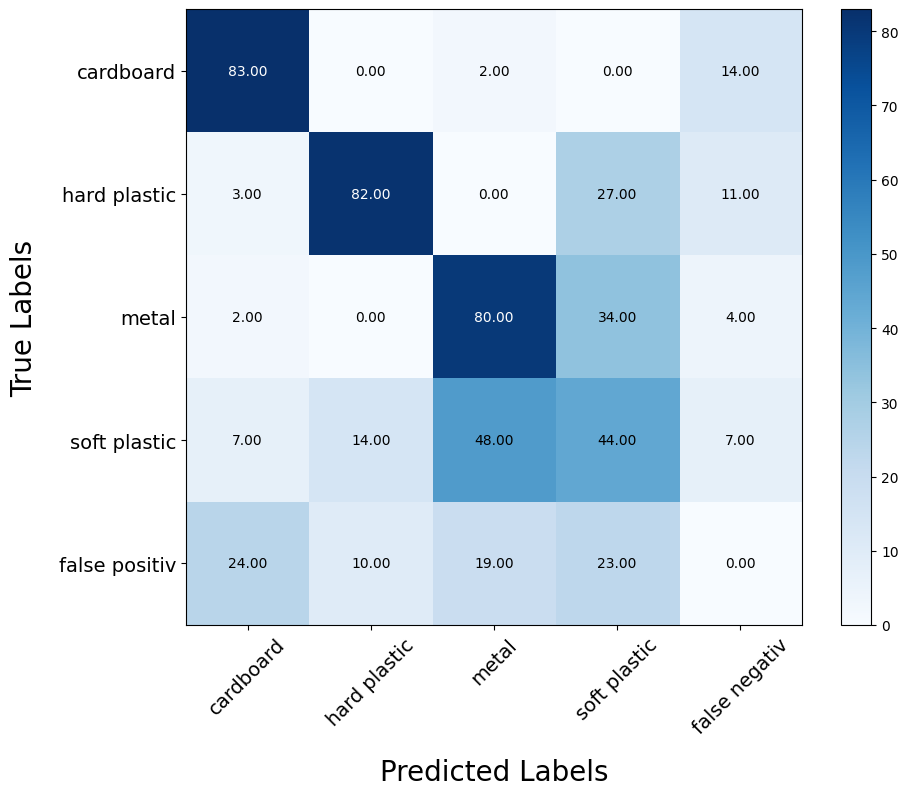

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming conf_matrix_normalized contains the normalized confusion matrix values
# The normalized confusion matrix (for demonstration purposes, replace with your actual data)
conf_matrix_normalized = np.array([
     [83, 0, 2, 0, 14],
     [3, 82, 0, 27, 11],
     [2, 0, 80, 34, 4],
     [7, 14, 48, 44, 7],
     [24, 10, 19, 23, 0]
])

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix_normalized, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Original class names
original_classes = ['cardboard', 'hard plastic', 'metal', 'soft plastic', 'false positiv']

# Manually renamed class names for the x-axis
renamed_classes = ['cardboard', 'hard plastic', 'metal', 'soft plastic', 'false negativ']

# Set the ticks for both axes
ax.set_xticks(np.arange(len(original_classes)))
ax.set_yticks(np.arange(len(original_classes)))

# Apply the manually renamed class names to the x-axis and original class names to the y-axis
class_label_font_size = 14  # Font size for class labels
ax.set_xticklabels(renamed_classes, rotation=45, ha='center', fontsize=class_label_font_size)
ax.set_yticklabels(original_classes, fontsize=class_label_font_size)

# Move the x-axis labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Set the labels for the axes with a specified font size
axis_label_font_size = 20  # Font size for axis labels
ax.set_xlabel('Predicted Labels', labelpad=15, fontsize=axis_label_font_size)
ax.set_ylabel('True Labels', labelpad=15, fontsize=axis_label_font_size)

# Set the font size for the text inside the confusion matrix
value_font_size = 10  # Font size for values inside the matrix

# Loop over data dimensions and create text annotations with adjusted font size.
for i in range(len(original_classes)):
    for j in range(len(original_classes)):
        plt.text(j, i, f"{conf_matrix_normalized[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if conf_matrix_normalized[i, j] > 50 else "black",
                 fontsize=value_font_size)

# Display the plot
plt.show()

## **normalization of the classes and adjustement of fontsize**

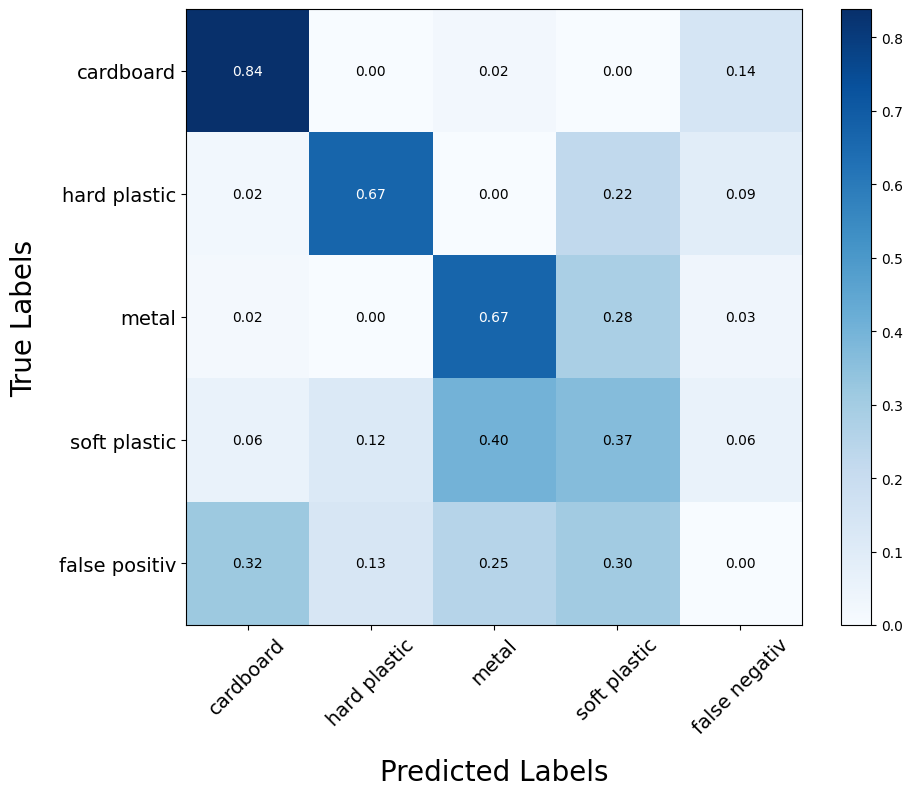

In [ ]:
import numpy as np

# Angenommen, das ist deine Confusion Matrix ohne die FP- und FN-Zeilen
conf_matrix = np.array([
    [83, 0, 2, 0, 14],
     [3, 82, 0, 27, 11],
     [2, 0, 80, 34, 4],
     [7, 14, 48, 44, 7],
     [24, 10, 19, 23, 0]
])

# Normalisierung der Confusion Matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(conf_matrix_normalized, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Original class names
original_classes = ['cardboard', 'hard plastic', 'metal', 'soft plastic', 'false positiv']
# Manually renamed class names for the x-axis
renamed_classes = ['cardboard', 'hard plastic', 'metal', 'soft plastic', 'false negativ']

# Set the ticks for both axes
ax.set_xticks(np.arange(len(original_classes)))
ax.set_yticks(np.arange(len(original_classes)))

# Apply the manually renamed class names to the x-axis and original class names to the y-axis
class_label_font_size = 14  # Font size for class labels
ax.set_xticklabels(renamed_classes, rotation=45, ha='center', fontsize=class_label_font_size)
ax.set_yticklabels(original_classes, fontsize=class_label_font_size)

# Move the x-axis labels to the bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Set the labels for the axes with a specified font size
axis_label_font_size = 20  # Font size for axis labels
ax.set_xlabel('Predicted Labels', labelpad=15, fontsize=axis_label_font_size)
ax.set_ylabel('True Labels', labelpad=15, fontsize=axis_label_font_size)

# Set the font size for the text inside the confusion matrix
value_font_size = 10  # Font size for values inside the matrix

# Loop over data dimensions and create text annotations with adjusted font size.
# Loop over data dimensions and create text annotations with adjusted font size.
for i in range(conf_matrix_normalized.shape[0]):  # Zeilenanzahl von conf_matrix_normalized
    for j in range(conf_matrix_normalized.shape[1]):  # Spaltenanzahl von conf_matrix_normalized
        plt.text(j, i, f"{conf_matrix_normalized[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if conf_matrix_normalized[i, j] > 0.5 else "black",
                 fontsize=value_font_size)


# Display the plot
plt.show()
